In [0]:
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import requests 
import datetime

In [0]:
user_name = "zyuzyaI" # User name on github

In [0]:
# Function create and return data
def get_data(user_name):
    html = requests.get("https://github.com/" + user_name)
    if html.status_code != 200:
        print("[INFO] Sorry but this response do not have data. Check your user name.")
        return None

    soup = BeautifulSoup(html.text, "lxml")
    svg = soup.find("g").find_all("g")
    all_activity = [[i["data-date"], i["data-count"]] for j in svg for i in j.find_all("rect")]
    
    number_days = len(all_activity)
    print("[INFO] There are days {}".format(number_days))

    #datetime.datetime(*[int(date) for date  in all_activity[1][0].split("-")]).weekday()
    data = []
    for i, d in enumerate(all_activity):
        week_day = datetime.datetime(*[int(date) for date in d[0].split("-")]).weekday()
        data.append((week_day, d[1], d[0]))
    
    return pd.DataFrame(np.array(data), columns=["week_day", "contribution", "date"])

In [4]:
df = get_data(user_name)
df["contribution"] = df.contribution.astype(int)
print("[INFO] Data shape {}".format(df.shape))
print(df.head())

[INFO] There are days 366
[INFO] Data shape (366, 3)
  week_day  contribution        date
0        6             0  2019-05-12
1        0             0  2019-05-13
2        1             0  2019-05-14
3        2             0  2019-05-15
4        3             0  2019-05-16


In [5]:
all_days = df.shape[0]

all_contribution = sum(df.contribution)
print("[INFO] All contributions {}".format(all_contribution))
print("---------------------------------------------------------")
n_contribution = df[df.contribution != 0].shape[0]
print("[INFO] Number of days with activity {}".format(n_contribution))
print("---------------------------------------------------------")
print("\t\t\tDay with max activity")
print(df[df.contribution == max(df.contribution)])
print("---------------------------------------------------------")

[INFO] All contributions 364
---------------------------------------------------------
[INFO] Number of days with activity 113
---------------------------------------------------------
			Day with max activity
    week_day  contribution        date
330        0            12  2020-04-06
---------------------------------------------------------


In [6]:
print("[INFO] Mean contribution (all days) {}".format(df.contribution.mean()))
print("---------------------------------------------------------")
print("[INFO] Mean contribution (days with activity) {}".format(all_contribution/n_contribution))
print("---------------------------------------------------------")

[INFO] Mean contribution (all days) 0.994535519125683
---------------------------------------------------------
[INFO] Mean contribution (days with activity) 3.2212389380530975
---------------------------------------------------------


In [7]:
data_vis = df.groupby(["week_day"]).sum()
print(data_vis)

          contribution
week_day              
0                   66
1                   43
2                   41
3                   47
4                   77
5                   45
6                   45


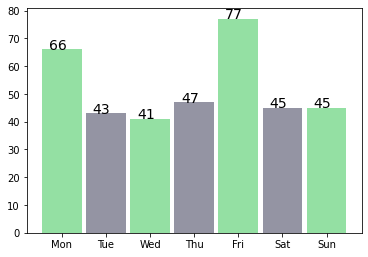

In [8]:
height = [i[0] for i in data_vis.values] 

# Create bars
barWidth = 0.9
bars1 = height[::2]
bars2 = height[1::2]
bars4 = bars1 + bars2 

# The X position of bars
height = [i[0] for i in data_vis.values]
r1 =  list(range(0,7,2))
r2 =  list(range(1,7,2))
r4 = r1 + r2

plt.bar(r1, bars1, width = barWidth, color = ((0.3,0.8,0.4,0.6)))
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.3,0.4,0.6))
# Note: the barplot could be created easily. See the barplot section for other examples.

# Text below each barplot
plt.xticks([r  for r in range(len(r4))], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Text on the top of each barplot
for i in range(len(r4)):
    plt.text(x = r4[i]-0.3, y = bars4[i]+0.1, s = bars4[i], size = 14)
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
plt.show()